In [1]:
!pip install holidays_es

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from sqlalchemy import create_engine
import seaborn as sns
from datetime import timedelta, date, datetime
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from holidays_es import Province
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
from google.colab import files
import io
uploaded = files.upload()

Saving Global DataBase3.csv to Global DataBase3.csv
Saving Global DataBase2 daily.csv to Global DataBase2 daily.csv


In [5]:
df=pd.read_csv(io.BytesIO(uploaded['Global DataBase2 daily.csv']), index_col='datetime_per_day', parse_dates=True, dayfirst = True)

df2=pd.read_csv(io.BytesIO(uploaded['Global DataBase3.csv']), index_col='datetime', parse_dates=True, dayfirst = True)

columns = ['Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA','Wind Onshore AA']
for column in columns : 
    df[column] = df2[column].resample("D").mean()

columns = ['Electricity Consumption (MWh)']
for column in columns : 
    df[column] = df2[column].resample("D").sum()
    
df = df.sort_index()
    
df = df.dropna()

In [6]:
df = df.loc[:"2021-01-01 00:00:00"]

In [7]:
df.drop(['Price - ES [€/MWh]'],  axis=1, inplace=True )
df.drop(['Actual Consumption (MWh)'],  axis=1, inplace=True )
df

,Price - PT [€/MWh],Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh)
datetime_per_day,,,,,,,,,,,,
2017-01-01,51.421739,351.652174,1138.826087,0.000000,137.173913,402.086957,405.695652,80.652174,40.000000,56.608696,651.478261,112128
2017-01-02,58.878333,347.166667,2182.416667,0.000000,226.958333,337.833333,535.375000,59.083333,39.375000,17.625000,3906.833333,117974
2017-01-03,65.245833,344.041667,2582.375000,0.000000,828.583333,441.375000,732.875000,355.958333,40.500000,23.083333,1877.000000,117974
2017-01-04,66.700417,339.541667,2573.000000,0.000000,580.708333,134.250000,653.750000,278.625000,38.333333,36.583333,207.083333,117974
2017-01-05,66.858750,347.208333,2172.125000,6.333333,527.791667,97.500000,855.750000,326.083333,41.416667,42.333333,549.875000,117974
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,19.621667,351.208333,530.041667,11.041667,483.250000,594.666667,918.333333,378.958333,25.750000,78.375000,3427.083333,117974
2020-12-29,38.260833,366.458333,862.875000,11.000000,954.208333,128.166667,1056.291667,730.041667,31.625000,89.875000,2449.583333,117974
2020-12-30,48.909583,379.416667,1170.666667,10.666667,687.958333,209.500000,1210.125000,486.791667,36.291667,135.625000,1064.750000,117974


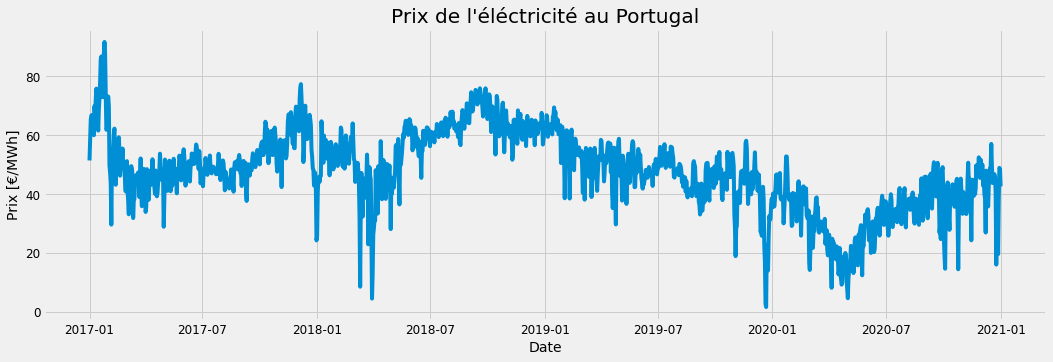

In [9]:
#Plot Price after data cleaning
plt.figure(figsize=(16,5))
plt.gca().set(title="Prix de l'éléctricité au Portugal", xlabel='Date', ylabel='Prix [€/MWh]')
plt.plot(df.index, df['Price - PT [€/MWh]'])  
plt.show()

In [10]:
#Détecter les valeurs négatives
df.describe()

,Price - PT [€/MWh],Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh)
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,47.932763,319.978330,1851.992414,6.862004,342.891563,222.722586,670.057333,264.059213,42.820394,114.042482,1419.623446,117970.001368
std,13.273469,54.318848,815.258403,7.172364,245.839519,221.236685,503.796134,228.773175,28.647061,47.538646,917.695085,152.892128
min,1.627500,95.333333,238.125000,0.000000,0.000000,1.625000,32.083333,10.416667,5.708333,6.125000,46.958333,112128.000000
25%,40.130833,299.531250,1170.572917,0.000000,161.947917,49.427083,289.468750,89.531250,29.166667,80.531250,708.104167,117974.000000
50%,48.407917,329.916667,1922.125000,6.062500,286.437500,163.416667,533.145833,187.666667,34.187500,115.291667,1185.062500,117974.000000
75%,57.040313,353.562500,2521.989583,10.416667,476.354167,334.052083,907.302083,376.104167,40.072917,144.739583,1979.218750,117974.000000
max,91.678750,420.250000,3415.125000,39.791667,1604.166667,1466.458333,2437.666667,1280.333333,159.875000,224.250000,4348.625000,117974.000000


In [11]:
#Données manquntes

df.isnull().values.any()

False

In [12]:
#Ajout des attributs supplémentaires  : Mois, type du jour, jour férié

def add_extra_attributes(df): 
    holidays= []
    holidays.append(Province(name="malaga",year=2017).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2017).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2017).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2018).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2018).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2018).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2019).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2019).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2019).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2020).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2020).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2020).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2021).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2021).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2021).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2022).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2022).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2022).holidays().get('regional_holidays'))
    
    holidays_dates=[]
    for i in range (len(holidays)):
        for j in range (len(holidays[i])):
            holidays_dates.append(holidays[i][j])
    df_holidays=pd.DataFrame({'Holidays': holidays_dates})

    df['holiday'] =0
    df['weekday']=0
    df['month']=0

    for i in range (len(df.index)):
        if (df.index[i].weekday() == 5 or df.index[i].weekday() == 6):
            df['weekday'][i]=1
        df['month'][i]= df.index[i].month
            
        for j in range (len(df_holidays)):
            if (df.index[i] == df_holidays['Holidays'][j]):
                df['holiday'][i]=1
    return df      


df_extra=add_extra_attributes(df)

In [13]:
df=df_extra[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)','holiday','weekday','month','Price - PT [€/MWh]']].dropna()

df

,Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh),holiday,weekday,month,Price - PT [€/MWh]
datetime_per_day,,,,,,,,,,,,,,,
2017-01-01,351.652174,1138.826087,0.000000,137.173913,402.086957,405.695652,80.652174,40.000000,56.608696,651.478261,112128,0,1,1,51.421739
2017-01-02,347.166667,2182.416667,0.000000,226.958333,337.833333,535.375000,59.083333,39.375000,17.625000,3906.833333,117974,1,0,1,58.878333
2017-01-03,344.041667,2582.375000,0.000000,828.583333,441.375000,732.875000,355.958333,40.500000,23.083333,1877.000000,117974,0,0,1,65.245833
2017-01-04,339.541667,2573.000000,0.000000,580.708333,134.250000,653.750000,278.625000,38.333333,36.583333,207.083333,117974,0,0,1,66.700417
2017-01-05,347.208333,2172.125000,6.333333,527.791667,97.500000,855.750000,326.083333,41.416667,42.333333,549.875000,117974,0,0,1,66.858750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,351.208333,530.041667,11.041667,483.250000,594.666667,918.333333,378.958333,25.750000,78.375000,3427.083333,117974,0,0,12,19.621667
2020-12-29,366.458333,862.875000,11.000000,954.208333,128.166667,1056.291667,730.041667,31.625000,89.875000,2449.583333,117974,0,0,12,38.260833
2020-12-30,379.416667,1170.666667,10.666667,687.958333,209.500000,1210.125000,486.791667,36.291667,135.625000,1064.750000,117974,0,0,12,48.909583


In [14]:
from pylab import rcParams

def eval_model(train_y, pred_ytrain, test_y, pred_y, model, att):
    rcParams['figure.figsize'] = 14, 6

    scores = [[ metrics.mean_absolute_error(train_y, pred_ytrain),  np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain)), np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain))/train_y.mean()],
    [ metrics.mean_absolute_error(test_y, pred_y),  np.sqrt(metrics.mean_squared_error(test_y, pred_y)), np.sqrt(metrics.mean_squared_error(test_y, pred_y))/test_y.mean()]]

    labels = ['MAE', 'RMSE', 'CV']

    p = np.arange(len(labels))

    width = 0.25

    fig, ax = plt.subplots()

    rects1 = ax.bar(p - width/2, scores[0], width, label='Train')
    rects2 = ax.bar(p + width/2, scores[1], width, label='Test')

    ax.set_title( model + ' Model - ' + att + ' attribute selection')
    ax.set_xticks(p)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show() 

In [15]:
def print_results(train_y, pred_ytrain, test_y, pred_y, exec_time):
    print('************* Train results *************')

    print('Mean Absolute Error:', '%.5f' %  metrics.mean_absolute_error(train_y, pred_ytrain))
    print('Root Mean Squared Error:','%.5f' %  np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain)))
    print('Coefficient of Variance:', '%.5f' %  ((np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain))/train_y.mean())*100))

    print('************* Test results *************')

    print('Mean Absolute Error:', '%.5f' % metrics.mean_absolute_error(test_y, pred_y))
    print('Root Mean Squared Error:', '%.5f' % np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
    print('Coefficient of Variance:', '%.5f' % ((np.sqrt(metrics.mean_squared_error(test_y, pred_y))/test_y.mean())*100))
    print('R2' , '%.5f' % metrics.r2_score(train_y, pred_ytrain))

    print('****************************************')
    print('Execution Time:', '%.5f' %  exec_time)

### XGBRegressor

In [16]:
import xgboost as xgb

X = df.values[:, :-1] #Features
y = df.values[:, -1] #output

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(xgbr, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(xgbr, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor(verbosity=0)
start_time = time.time()
xgbr.fit(xtrain, ytrain)
exec_time = time.time()-start_time

ypredtr = xgbr.predict(xtrain)
ypredts = xgbr.predict(xtest)
print_results(ytrain, ypredtr, ytest, ypredts, exec_time)

Features selected by forward sequential selection: ['Biomass AA' 'Fossil Gas AA' 'Fossil Hard Coal AC'
 'Hydro Pumped Storage AC' 'Hydro Run-of-river and poundage AA' 'Other AA'
 'weekday']
Features selected by backward sequential selection: ['Biomass AA' 'Fossil Gas AA' 'Fossil Hard Coal AC'
 'Hydro Pumped Storage AA' 'Hydro Pumped Storage AC'
 'Hydro Run-of-river and poundage AA' 'Other AA']
************* Train results *************
Mean Absolute Error: 3.12934
Root Mean Squared Error: 4.07929
Coefficient of Variance: 8.54285
************* Test results *************
Mean Absolute Error: 4.05966
Root Mean Squared Error: 5.46204
Coefficient of Variance: 11.15628
R2 0.90569
****************************************
Execution Time: 0.12190


In [17]:
X = sfs_backward.transform(X) 

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor(verbosity=0)
start_time = time.time()
xgbr.fit(xtrain, ytrain)
exec_time = time.time()-start_time

ypredtr = xgbr.predict(xtrain)
ypredts = xgbr.predict(xtest)
print_results(ytrain, ypredtr, ytest, ypredts, exec_time)

************* Train results *************
Mean Absolute Error: 4.03867
Root Mean Squared Error: 5.19478
Coefficient of Variance: 10.85673
************* Test results *************
Mean Absolute Error: 5.23636
Root Mean Squared Error: 6.89958
Coefficient of Variance: 14.25289
R2 0.84742
****************************************
Execution Time: 0.08898


### MLR

In [18]:
X = df.values[:, :-1] #Features
y = df.values[:, -1] #output

#Normalisation
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [19]:
reg=linear_model.LinearRegression()
reg.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(reg, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['Biomass AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AA'
 'Hydro Pumped Storage AC' 'Solar AA' 'Wind Onshore AA' 'weekday']
Features selected by backward sequential selection: ['Biomass AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AA'
 'Hydro Pumped Storage AC' 'Solar AA' 'Wind Onshore AA' 'weekday']


In [20]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.2)

reg = linear_model.LinearRegression()

start_time = time.time()
model = reg.fit(train_X, train_y)
exec_time = time.time()-start_time
pred_y = model.predict(test_X)
pred_ytrain = model.predict(train_X)

In [21]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 6.79214
Root Mean Squared Error: 8.73050
Coefficient of Variance: 18.21751
************* Test results *************
Mean Absolute Error: 6.74916
Root Mean Squared Error: 8.69347
Coefficient of Variance: 18.12310
R2 0.55952
****************************************
Execution Time: 0.00221


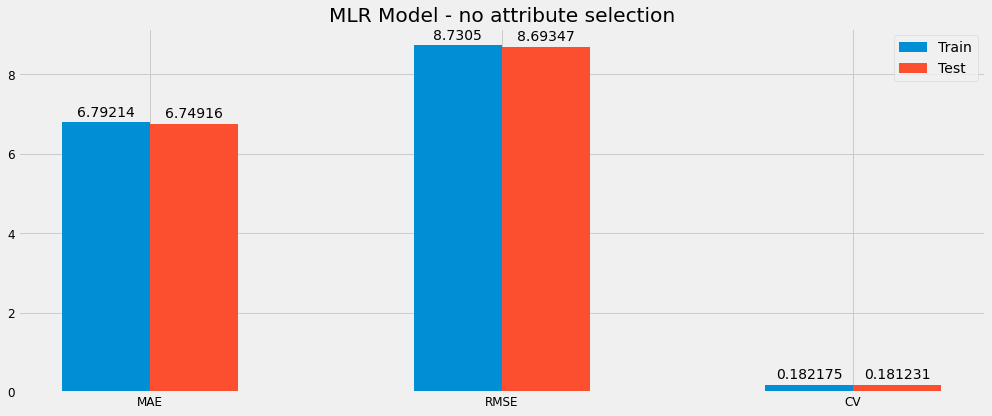

In [22]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "MLR", "no")

#### Selection d'attributs

In [23]:
#Features selection 
X = sfs_backward.transform(X) 

train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.2)

reg = linear_model.LinearRegression()

start_time = time.time()
model = reg.fit(train_X, train_y)
exec_time = time.time()-start_time
pred_y = model.predict(test_X)
pred_ytrain = model.predict(train_X)

In [24]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 6.92620
Root Mean Squared Error: 9.28255
Coefficient of Variance: 19.33057
************* Test results *************
Mean Absolute Error: 6.43686
Root Mean Squared Error: 8.49954
Coefficient of Variance: 17.86200
R2 0.52164
****************************************
Execution Time: 0.00135


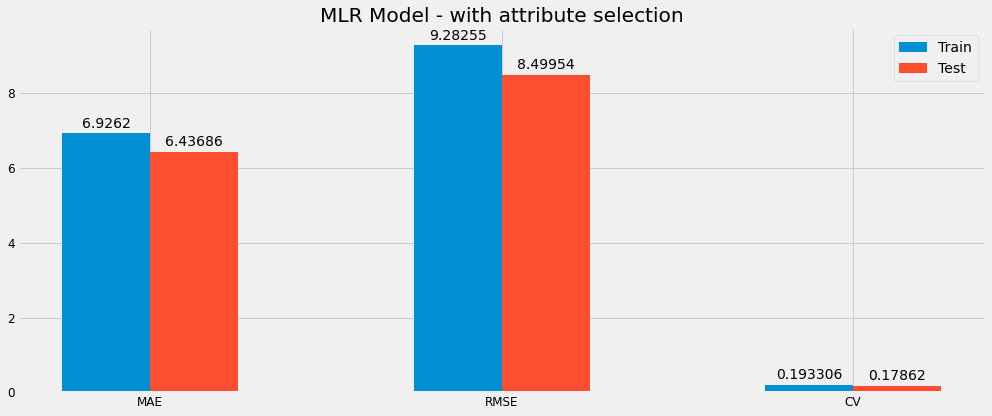

In [25]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "MLR", "with")

### SVR

In [26]:
df=df_extra[[ 'Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month', 'Price - PT [€/MWh]']]

X = df.values[:, :-1] #Features
y = df.values[:, -1] #output

#Normalisation
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [27]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.2)

params = {'kernel': ('linear','poly','rbf'),
          'C':[0.01,0.1,1,10],
          'gamma': [1e-7, 1e-4, 0.001, 0.1, 1],
          'epsilon':[0.1,0.2,0.3,0.5]}

svr = SVR()

grid_search = GridSearchCV(svr, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time = time.time()
grid_search.fit(train_X, train_y)
exec_time = time.time()-start_time

print(grid_search.best_params_)

model = grid_search.best_estimator_
pred_y = model.predict(test_X)

pred_ytrain = model.predict(train_X)

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [28]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 4.09509
Root Mean Squared Error: 5.93885
Coefficient of Variance: 12.42371
************* Test results *************
Mean Absolute Error: 4.73067
Root Mean Squared Error: 6.47660
Coefficient of Variance: 13.36698
R2 0.80553
****************************************
Execution Time: 153.12701


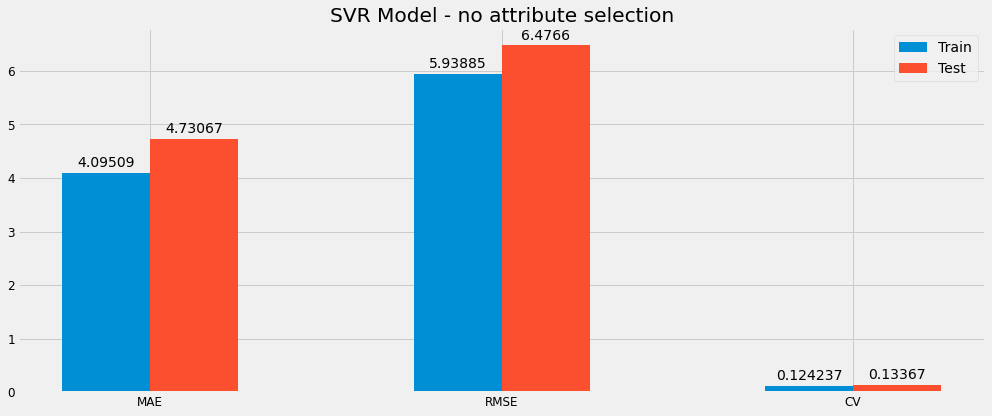

In [29]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "SVR", "no")

Selection d'attributs

In [30]:
svr=SVR()
svr.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(svr, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(svr, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['Biomass AA' 'Fossil Gas AA' 'Fossil Hard Coal AC'
 'Hydro Pumped Storage AC' 'Other AA' 'Solar AA'
 'Electricity Consumption (MWh)']
Features selected by backward sequential selection: ['Biomass AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AA'
 'Hydro Pumped Storage AC' 'Other AA' 'Solar AA'
 'Electricity Consumption (MWh)']


In [31]:
#Features selection 
X = sfs_backward.transform(X) 

train_X, test_X, train_y, test_y = train_test_split( X, y, test_size=0.2)

grid_search = GridSearchCV(svr, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time=time.time()
grid_search.fit(train_X, train_y)
exec_time= time.time()-start_time

print(grid_search.best_params_)

model=grid_search.best_estimator_
pred_y=model.predict(test_X)

pred_ytrain=model.predict(train_X)

{'C': 10, 'epsilon': 0.5, 'gamma': 1, 'kernel': 'poly'}


In [32]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 6.26208
Root Mean Squared Error: 8.50503
Coefficient of Variance: 17.76968
************* Test results *************
Mean Absolute Error: 6.12840
Root Mean Squared Error: 8.19940
Coefficient of Variance: 17.00669
R2 0.60487
****************************************
Execution Time: 126.42915


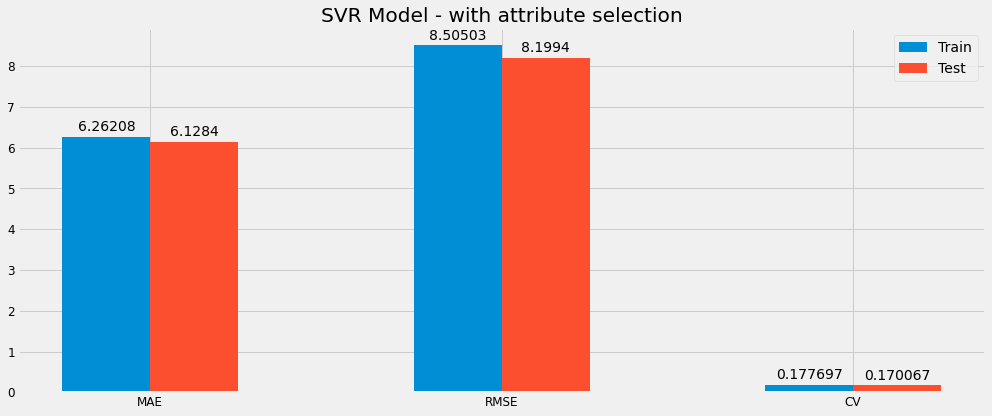

In [33]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "SVR", "with")

RF

In [34]:
df=df_extra[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month','Price - PT [€/MWh]']]

X=df.values[:, :-1] #Features
y=df.values[:, -1] #output

#Normalisation
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [35]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.2)

#Parameters Tunning
params = { 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth' : [4,5,6,7,8,10],'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

rf=RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time = time.time()
grid_search.fit(train_X, train_y)
exec_time = time.time()-start_time

print(grid_search.best_params_)

model=grid_search.best_estimator_
pred_y=model.predict(test_X)

pred_ytrain=model.predict(train_X)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [36]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 1.70975
Root Mean Squared Error: 2.22253
Coefficient of Variance: 4.59239
************* Test results *************
Mean Absolute Error: 3.61514
Root Mean Squared Error: 4.89980
Coefficient of Variance: 10.63219
R2 0.97247
****************************************
Execution Time: 1995.94373


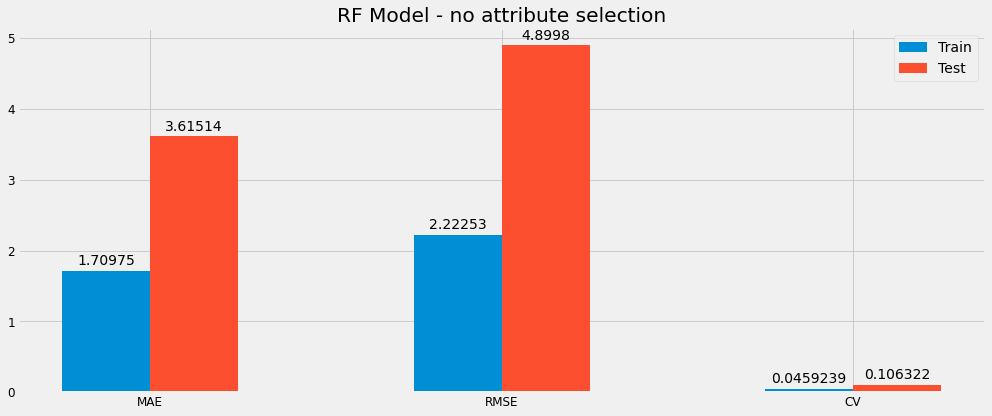

In [37]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "RF", "no")

Selection d'attributs

In [38]:
rf=RandomForestRegressor()
rf.fit(X, y)

feature_names = np.array(df[[ 'Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(rf, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(rf, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['Biomass AA' 'Fossil Gas AA' 'Fossil Hard Coal AC'
 'Hydro Pumped Storage AC' 'Other AA' 'Solar AA' 'weekday']
Features selected by backward sequential selection: ['Biomass AA' 'Fossil Gas AA' 'Fossil Hard Coal AC'
 'Hydro Pumped Storage AC' 'Other AA' 'Solar AA' 'Wind Onshore AA']


In [39]:
#Features selection 
X = sfs_backward.transform(X) 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
rf=RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time=time.time()
grid_search.fit(train_X, train_y)
exec_time= time.time()-start_time

model=grid_search.best_estimator_
pred_y=model.predict(test_X)

print(grid_search.best_params_)

pred_ytrain=model.predict(train_X)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [40]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 2.62363
Root Mean Squared Error: 3.48559
Coefficient of Variance: 7.25709
************* Test results *************
Mean Absolute Error: 4.29009
Root Mean Squared Error: 5.67951
Coefficient of Variance: 11.94577
R2 0.93130
****************************************
Execution Time: 1633.26660


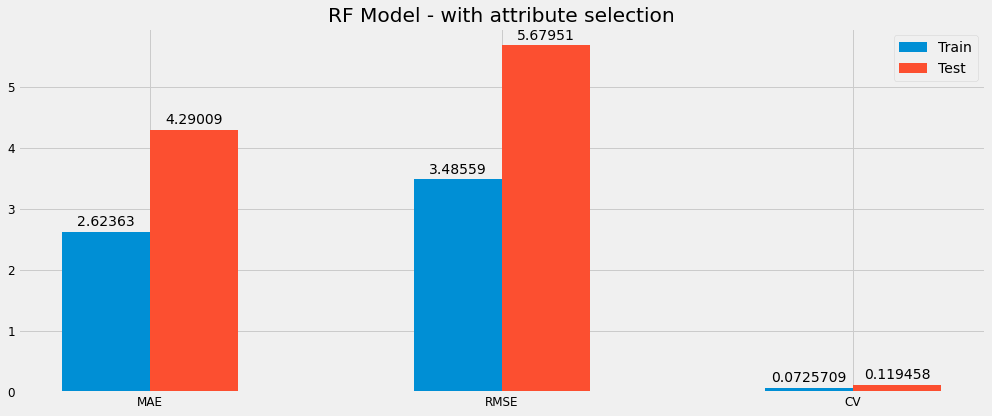

In [41]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "RF", "with")